In [1]:
import matplotlib.pyplot as plt
import fastf1 as ff
import fastf1.plotting as ffp
import pandas as pd
import seaborn as sns

In [104]:
# ffp.setup_mpl(misc_mpl_mods=False, color_scheme="fastf1")

In [2]:
# getting some raw data to test if the data is good?
session = ff.get_session(2022, "Bahrain", "R")

session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\mshaf\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track

In [106]:
session.name

'Race'

In [107]:
session.date

Timestamp('2022-03-20 15:00:00')

In [108]:
session.event

RoundNumber                                                   1
Country                                                 Bahrain
Location                                                 Sakhir
OfficialEventName    FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022
EventDate                                   2022-03-20 00:00:00
EventName                                    Bahrain Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                          2022-03-18 15:00:00+03:00
Session1DateUtc                             2022-03-18 12:00:00
Session2                                             Practice 2
Session2Date                          2022-03-18 18:00:00+03:00
Session2DateUtc                             2022-03-18 15:00:00
Session3                                             Practice 3
Session3Date                          2022-03-19 15:00:00+03:00
Session3DateUtc                         

In [109]:
session.event['EventName']

'Bahrain Grand Prix'

In [110]:
event = ff.get_event(2024, "Monza")
print(event)

RoundNumber                                                   16
Country                                                    Italy
Location                                                   Monza
OfficialEventName    FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2024
EventDate                                    2024-09-01 00:00:00
EventName                                     Italian Grand Prix
EventFormat                                         conventional
Session1                                              Practice 1
Session1Date                           2024-08-30 13:30:00+02:00
Session1DateUtc                              2024-08-30 11:30:00
Session2                                              Practice 2
Session2Date                           2024-08-30 17:00:00+02:00
Session2DateUtc                              2024-08-30 15:00:00
Session3                                              Practice 3
Session3Date                           2024-08-31 12:30:00+02:00
Session3DateUtc          

In [111]:
# loading by the event is very efficient than session, but we can't pull lap data from this
event_2 = ff.get_event(2022, 'French Grand Prix')
print(event_2.Location)
print(event_2.Country)

Le Castellet
France


### Car Data

In [112]:
car_data = session.car_data
car_data

{'16':                          Date  RPM  Speed  nGear  Throttle  Brake  DRS Source  \
 0     2022-03-20 14:01:03.298  0.0    0.0      0     104.0   True    1    car   
 1     2022-03-20 14:01:03.498  0.0    0.0      0     104.0   True    1    car   
 2     2022-03-20 14:01:03.738  0.0    0.0      0     104.0   True    1    car   
 3     2022-03-20 14:01:04.178  0.0    0.0      0     104.0   True    1    car   
 4     2022-03-20 14:01:04.418  0.0    0.0      0     104.0   True    1    car   
 ...                       ...  ...    ...    ...       ...    ...  ...    ...   
 36651 2022-03-20 16:44:07.365  0.0    0.0      0       0.0  False    0    car   
 36652 2022-03-20 16:44:07.645  0.0    0.0      0       0.0  False    0    car   
 36653 2022-03-20 16:44:07.885  0.0    0.0      0       0.0  False    0    car   
 36654 2022-03-20 16:44:08.164  0.0    0.0      0       0.0  False    0    car   
 36655 2022-03-20 16:44:08.324  0.0    0.0      0       0.0  False    0    car   
 
        

### Laps Data

In [3]:
laps_data = session.laps
laps_data.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:15.340000,VER,1,0 days 00:01:40.236000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.325000,...,False,Red Bull Racing,0 days 01:02:34.872000,2022-03-20 15:03:34.889,1,2.0,False,,False,False
1,0 days 01:05:53.220000,VER,1,0 days 00:01:37.880000,2.0,1.0,NaT,NaT,0 days 00:00:31.285000,0 days 00:00:42.269000,...,False,Red Bull Racing,0 days 01:04:15.340000,2022-03-20 15:05:15.357,1,2.0,False,,False,True
2,0 days 01:07:31.577000,VER,1,0 days 00:01:38.357000,3.0,1.0,NaT,NaT,0 days 00:00:31.499000,0 days 00:00:42.474000,...,False,Red Bull Racing,0 days 01:05:53.220000,2022-03-20 15:06:53.237,1,2.0,False,,False,True
3,0 days 01:09:10.143000,VER,1,0 days 00:01:38.566000,4.0,1.0,NaT,NaT,0 days 00:00:31.342000,0 days 00:00:42.674000,...,False,Red Bull Racing,0 days 01:07:31.577000,2022-03-20 15:08:31.594,1,2.0,False,,False,True
4,0 days 01:10:49.020000,VER,1,0 days 00:01:38.877000,5.0,1.0,NaT,NaT,0 days 00:00:31.498000,0 days 00:00:42.854000,...,False,Red Bull Racing,0 days 01:09:10.143000,2022-03-20 15:10:10.160,1,2.0,False,,False,True


In [4]:
laps_data.shape

(1125, 31)

In [5]:
len(laps_data.columns)

31

In [6]:
laps_data.info()

<class 'fastf1.core.Laps'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1125 non-null   timedelta64[ns]
 1   Driver              1125 non-null   object         
 2   DriverNumber        1125 non-null   object         
 3   LapTime             1118 non-null   timedelta64[ns]
 4   LapNumber           1125 non-null   float64        
 5   Stint               1125 non-null   float64        
 6   PitOutTime          58 non-null     timedelta64[ns]
 7   PitInTime           59 non-null     timedelta64[ns]
 8   Sector1Time         1103 non-null   timedelta64[ns]
 9   Sector2Time         1123 non-null   timedelta64[ns]
 10  Sector3Time         1123 non-null   timedelta64[ns]
 11  Sector1SessionTime  1101 non-null   timedelta64[ns]
 12  Sector2SessionTime  1123 non-null   timedelta64[ns]
 13  Sector3SessionTime  1123 non-null   timedelt

In [117]:
laps_data.describe()

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime,LapStartDate,Position
count,1125,1118,1125.000000,1125.000000,58,59,1103,1123,1123,1101,1123,1123,891.000000,1123.000000,1064.000000,974.000000,1125.000000,1125,1123,1123.000000
mean,0 days 01:51:24.933827555,0 days 00:01:42.904558139,28.688000,2.346667,0 days 01:54:10.830396551,0 days 01:54:28.214745762,0 days 00:00:33.465555757,0 days 00:00:44.187918967,0 days 00:00:25.434068566,0 days 01:51:00.237800181,0 days 01:50:55.514968833,0 days 01:51:20.949266251,224.600449,243.087266,273.296992,286.223819,9.128000,0 days 01:49:41.832264,2022-03-20 15:50:37.800792576,10.360641
min,0 days 01:04:14.174000,0 days 00:01:34.570000,1.000000,1.000000,0 days 01:21:19.982000,0 days 01:20:54.774000,0 days 00:00:30.439000,0 days 00:00:40.732000,0 days 00:00:23.399000,0 days 01:04:45.838000,0 days 01:03:50.298000,0 days 01:04:14.291000,86.000000,93.000000,108.000000,101.000000,1.000000,0 days 01:02:34.872000,2022-03-20 15:03:34.889000,1.000000
25%,0 days 01:27:34.749000,0 days 00:01:38.491750,15.000000,1.000000,0 days 01:28:25.218750,0 days 01:28:00.823000,0 days 00:00:31.430500,0 days 00:00:42.635000,0 days 00:00:24.215000,0 days 01:27:12.278000,0 days 01:27:00.818500,0 days 01:27:27.986500,226.000000,242.000000,274.000000,288.000000,5.000000,0 days 01:25:45.230000,2022-03-20 15:26:42.173000192,5.000000
50%,0 days 01:50:44.162000,0 days 00:01:39.826000,29.000000,2.000000,0 days 01:57:47.404000,0 days 01:57:24.378000,0 days 00:00:31.791000,0 days 00:00:43.293000,0 days 00:00:24.544000,0 days 01:50:29.171000,0 days 01:50:18.231000,0 days 01:50:42.863000,229.000000,249.000000,277.000000,295.000000,9.000000,0 days 01:49:05.209000,2022-03-20 15:50:03.820000,10.000000
75%,0 days 02:14:26.156000,0 days 00:01:41.871750,43.000000,3.000000,0 days 02:15:08.104000,0 days 02:15:15.093500,0 days 00:00:32.209500,0 days 00:00:44.130500,0 days 00:00:24.963500,0 days 02:13:43.801000,0 days 02:13:55.445500,0 days 02:14:19.825500,232.000000,254.000000,280.000000,300.000000,13.000000,0 days 02:12:45.216000,2022-03-20 16:13:34.318500096,15.000000
max,0 days 02:41:12.517000,0 days 00:02:29.264000,57.000000,4.000000,0 days 02:22:20.404000,0 days 02:35:48.693000,0 days 00:01:05.178000,0 days 00:01:08.540000,0 days 00:00:49.646000,0 days 02:40:04.473000,0 days 02:40:48.001000,0 days 02:41:12.549000,240.000000,265.000000,292.000000,327.000000,24.000000,0 days 02:39:31.337000,2022-03-20 16:40:31.354000,20.000000
std,0 days 00:28:03.911617367,0 days 00:00:09.417678977,16.338378,1.074949,0 days 00:21:10.735189384,0 days 00:21:41.946366361,0 days 00:00:05.504733975,0 days 00:00:03.661846240,0 days 00:00:03.003269927,0 days 00:27:33.186769022,0 days 00:28:01.813493001,0 days 00:28:02.530734867,19.336748,23.179172,19.113370,30.697028,4.975703,0 days 00:28:02.175606401,NaN,5.698683


In [7]:
drivers = laps_data["Driver"].unique()
print(drivers)

['VER' 'GAS' 'PER' 'ALO' 'LEC' 'STR' 'MAG' 'TSU' 'ALB' 'ZHO' 'HUL' 'RIC'
 'OCO' 'NOR' 'HAM' 'MSC' 'SAI' 'LAT' 'RUS' 'BOT']


In [8]:
verstappan_laps = laps_data.pick_driver('VER')
verstappan_laps.head()

e:\Cody\Portfolio_\ML_DS\real-time-f1race-strategy-advisor\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:15.340000,VER,1,0 days 00:01:40.236000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.325000,...,False,Red Bull Racing,0 days 01:02:34.872000,2022-03-20 15:03:34.889,1,2.0,False,,False,False
1,0 days 01:05:53.220000,VER,1,0 days 00:01:37.880000,2.0,1.0,NaT,NaT,0 days 00:00:31.285000,0 days 00:00:42.269000,...,False,Red Bull Racing,0 days 01:04:15.340000,2022-03-20 15:05:15.357,1,2.0,False,,False,True
2,0 days 01:07:31.577000,VER,1,0 days 00:01:38.357000,3.0,1.0,NaT,NaT,0 days 00:00:31.499000,0 days 00:00:42.474000,...,False,Red Bull Racing,0 days 01:05:53.220000,2022-03-20 15:06:53.237,1,2.0,False,,False,True
3,0 days 01:09:10.143000,VER,1,0 days 00:01:38.566000,4.0,1.0,NaT,NaT,0 days 00:00:31.342000,0 days 00:00:42.674000,...,False,Red Bull Racing,0 days 01:07:31.577000,2022-03-20 15:08:31.594,1,2.0,False,,False,True
4,0 days 01:10:49.020000,VER,1,0 days 00:01:38.877000,5.0,1.0,NaT,NaT,0 days 00:00:31.498000,0 days 00:00:42.854000,...,False,Red Bull Racing,0 days 01:09:10.143000,2022-03-20 15:10:10.160,1,2.0,False,,False,True


In [9]:
verstappan_laps.shape

(54, 31)

In [10]:
hamilton_laps = laps_data.pick_driver('HAM')
hamilton_laps.head()

e:\Cody\Portfolio_\ML_DS\real-time-f1race-strategy-advisor\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
783,0 days 01:04:16.659000,HAM,44,0 days 00:01:41.555000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.966000,...,False,Mercedes,0 days 01:02:34.872000,2022-03-20 15:03:34.889,1,4.0,False,,False,False
784,0 days 01:05:55.661000,HAM,44,0 days 00:01:39.002000,2.0,1.0,NaT,NaT,0 days 00:00:31.844000,0 days 00:00:42.722000,...,False,Mercedes,0 days 01:04:16.659000,2022-03-20 15:05:16.676,1,4.0,False,,False,True
785,0 days 01:07:34.736000,HAM,44,0 days 00:01:39.075000,3.0,1.0,NaT,NaT,0 days 00:00:31.671000,0 days 00:00:42.931000,...,False,Mercedes,0 days 01:05:55.661000,2022-03-20 15:06:55.678,1,4.0,False,,False,True
786,0 days 01:09:13.628000,HAM,44,0 days 00:01:38.892000,4.0,1.0,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.990000,...,False,Mercedes,0 days 01:07:34.736000,2022-03-20 15:08:34.753,1,4.0,False,,False,True
787,0 days 01:10:52.551000,HAM,44,0 days 00:01:38.923000,5.0,1.0,NaT,NaT,0 days 00:00:31.550000,0 days 00:00:42.893000,...,False,Mercedes,0 days 01:09:13.628000,2022-03-20 15:10:13.645,1,4.0,False,,False,True


In [11]:
hamilton_laps.shape

(57, 31)

In [12]:
hamilton_laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [13]:
# we actually need couple of columns

hamilton_laps_df = hamilton_laps[["LapNumber", "LapTime", "Compound", "TyreLife"]]
hamilton_laps_df.head()

,LapNumber,LapTime,Compound,TyreLife
783,1.0,0 days 00:01:41.555000,SOFT,3.0
784,2.0,0 days 00:01:39.002000,SOFT,4.0
785,3.0,0 days 00:01:39.075000,SOFT,5.0
786,4.0,0 days 00:01:38.892000,SOFT,6.0
787,5.0,0 days 00:01:38.923000,SOFT,7.0


In [14]:
hamilton_laps_df.isnull().sum()

LapNumber    0
LapTime      0
Compound     0
TyreLife     0
dtype: int64

In [15]:
first_lap_time = hamilton_laps_df.iloc[0]["LapTime"]
print(first_lap_time)

0 days 00:01:41.555000


In [16]:
first_lap_time_seconds = first_lap_time.total_seconds()
print(f"First LapTime in seconds: {first_lap_time_seconds}")

First LapTime in seconds: 101.555


### Visualization from `hamilton_laps_df`

array([[<Axes: title={'center': 'LapNumber'}>,
        <Axes: title={'center': 'TyreLife'}>]], dtype=object)

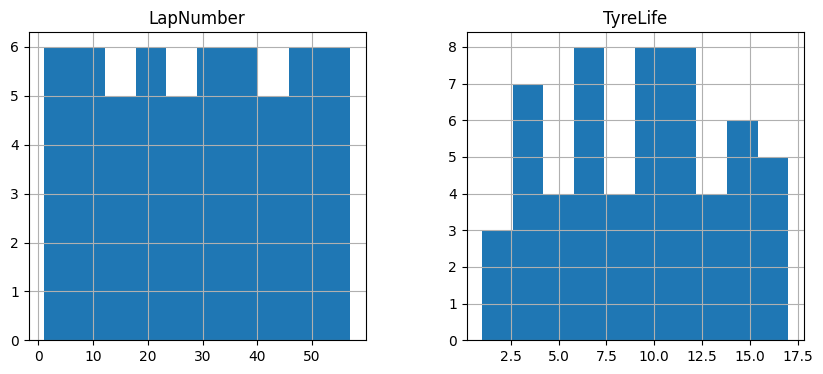

In [17]:
features = ["LapNumber", "TyreLife"]
hamilton_laps_df[features].hist(figsize=(10, 4))

<Axes: xlabel='TyreLife', ylabel='Density'>

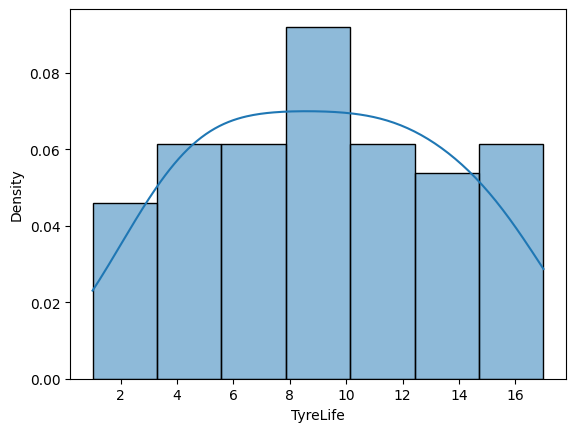

In [18]:
sns.histplot(hamilton_laps_df["TyreLife"], kde=True, stat='density')

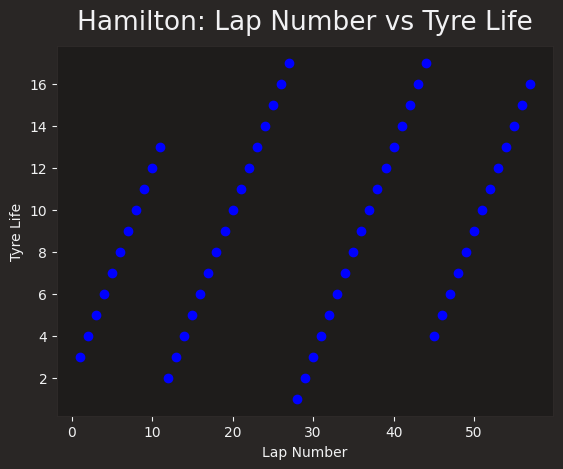

In [132]:
# scatter plot for visulize 'LapNumber' against 'TyreLife'

plt.scatter(hamilton_laps_df["LapNumber"], hamilton_laps_df["TyreLife"], c='blue')
plt.xlabel('Lap Number')
plt.ylabel('Tyre Life')
plt.title('Hamilton: Lap Number vs Tyre Life')
plt.show()